In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
from datetime import datetime, timedelta
import sys

#import the folder that has the analysis level class
sys.path.append("../CombinedData/")
sys.path.append("../AnalysisTools/")
import Dataset
import AnalysisTools

In [84]:
topdir = "../../data/Run9/"
datasets = ["ds01/","ds02/","ds03/", "ds04/","ds05/","ds06/","ds07/",\
        "ds08/","ds09/","ds10/","ds11/"]

ds_single = "ds14/"
config = "../configs/run9_config.yaml"

In [85]:
#load the dataset object for the single file selected
ds = Dataset.Dataset(topdir+ds_single, config)

Problem! Found no Struck data files with prefix 'prereduced*.p' in ../../data/Run9/ds14/struck/


In [87]:
ds.reduce_data(light=False)
#print(ds.reduced_df.columns)
#pickle.dump([ds.reduced_df], open(topdir+ds_single+"reduced.p", "wb"))

Reducing charge data
case 1nt 83 of 115
case 1nt 85 of 115
case 1nt 90 of 115
case 1nt 109 of 115
Reduction took 0.118614 seconds


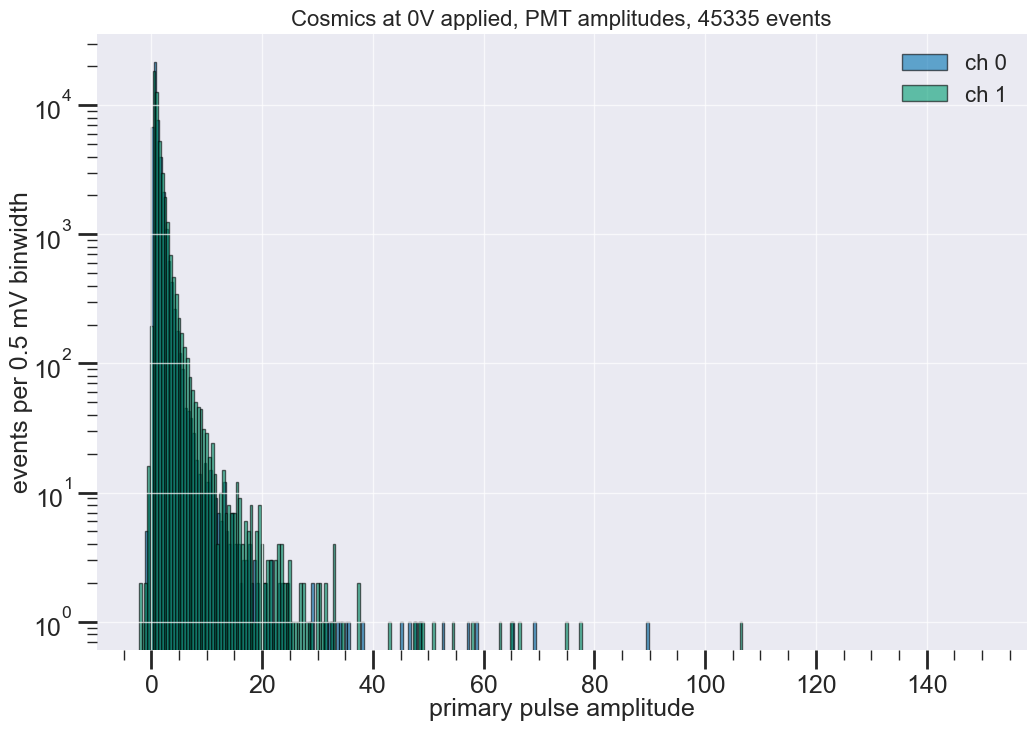

In [35]:
d = ds.reduced_df

fig, ax = plt.subplots()
h = np.array(d["ch0 trigger integral"])
h = h[~np.equal(h, None)]
binwidth = 0.5 #mV
bins = np.arange(min(h), max(h), binwidth)
ax.hist(h, bins=bins, label="ch 0", alpha=0.6)

h = np.array(d["ch1 trigger integral"])
h = h[~np.equal(h, None)]
binwidth = 0.5 #mV
bins = np.arange(min(h), max(h), binwidth)
ax.hist(h, bins=bins, label="ch 1", alpha=0.6)

ax.legend()
ax.set_xlabel("primary pulse amplitude")
ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
ax.set_title("Cosmics at 0V applied, PMT amplitudes, {} events".format(len(d.index)))
ax.set_yscale('log')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


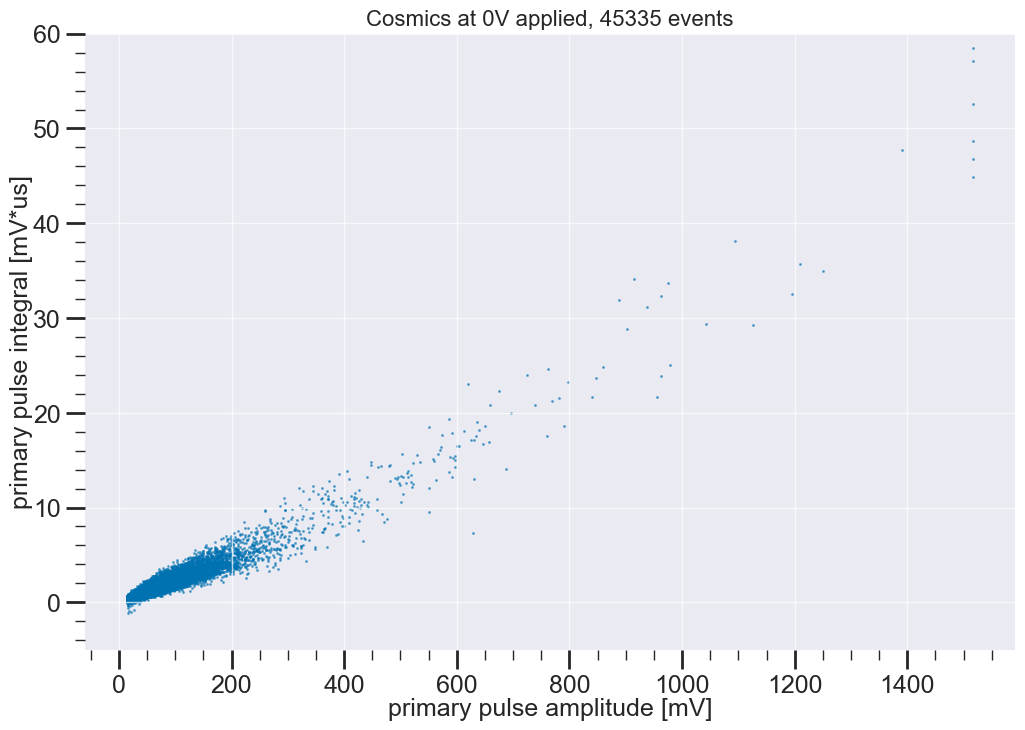

In [37]:
d = ds.reduced_df

fig, ax = plt.subplots()
h1 = np.array(d["ch0 trigger integral"])
h1 = h1[~np.equal(h, None)]
h2 = np.array(d["ch0 amp"])
h2 = h2[~np.equal(h, None)]
ax.scatter(h2, h1, alpha=0.5, s=5)

ax.legend()
ax.set_ylim([-5, 60])
ax.set_xlabel("primary pulse amplitude [mV]")
ax.set_ylabel("primary pulse integral [mV*us]")
ax.set_title("Cosmics at 0V applied, {} events".format(len(h1)))
#ax.set_yscale('log')
plt.show()

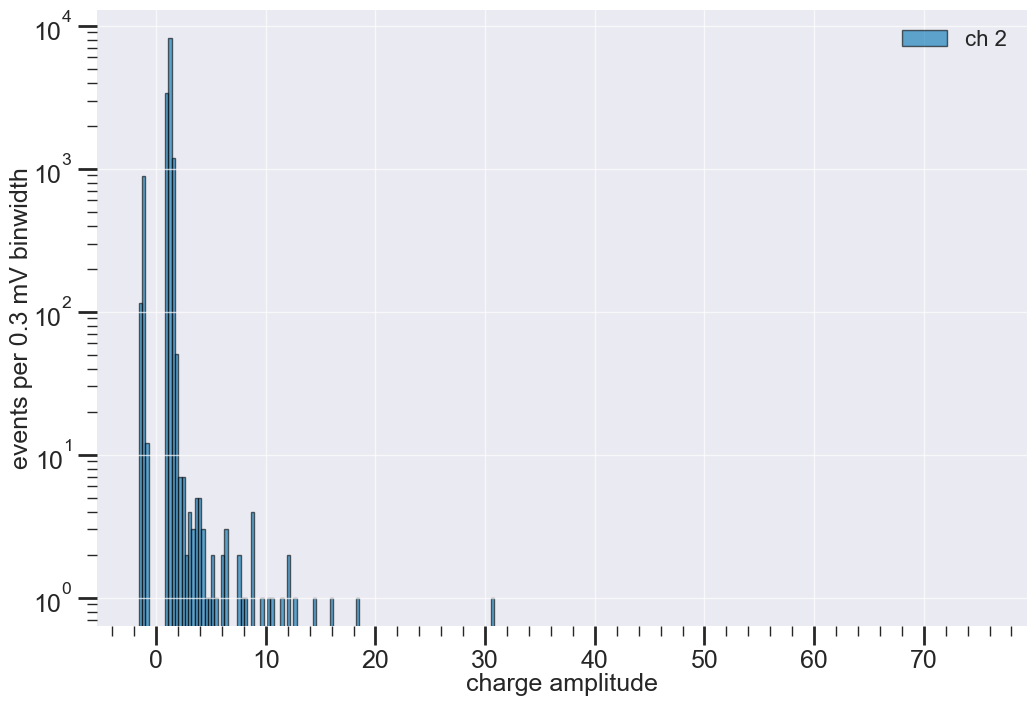

In [50]:
d = ds.reduced_df
fig, ax = plt.subplots()
h = np.array(d["ch2 amp"])
binwidth = 0.3 #mV
bins = np.arange(min(h), max(h), binwidth)
ax.hist(h, bins=bins, label="ch 2", alpha=0.6)

ax.legend()
ax.set_xlabel("charge amplitude")
ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
ax.set_yscale('log')
plt.show()

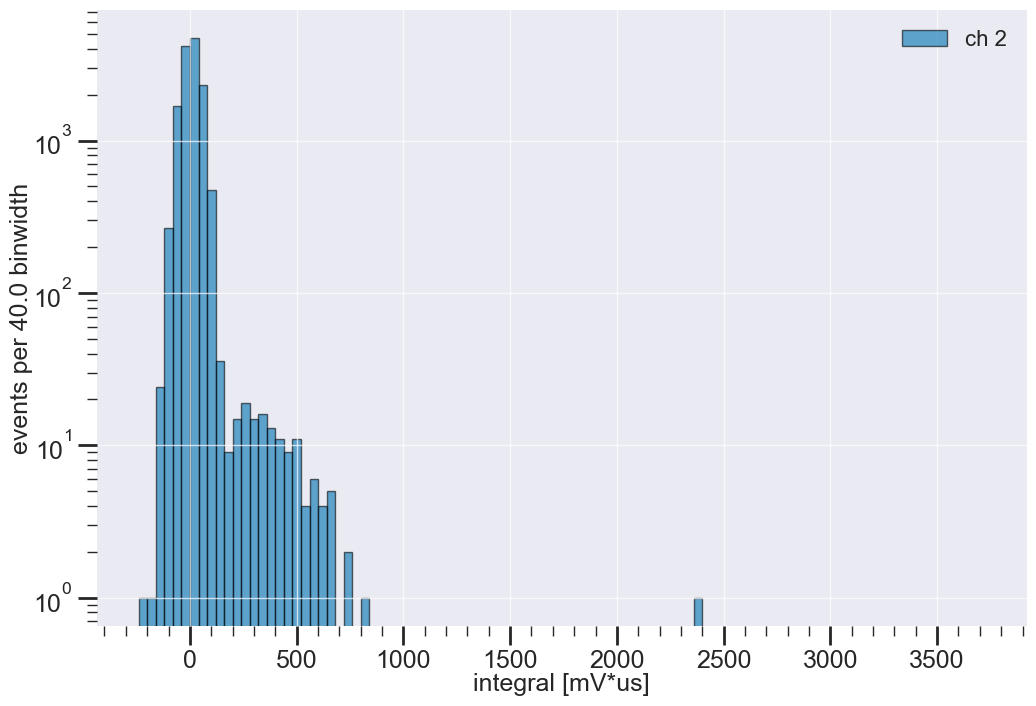

In [57]:
d = ds.reduced_df
cut = (d["ch2 n peaks"] == 0)
dd = d[cut]
fig, ax = plt.subplots()
h = np.array(dd["ch2 full integral"])
binwidth = 40 #mV*us
bins = np.arange(min(h), max(h), binwidth)
ax.hist(h, bins=bins, label="ch 2", alpha=0.6)

ax.legend()
ax.set_xlabel("integral [mV*us]")
ax.set_ylabel("events per {:.1f} binwidth".format(binwidth))
ax.set_yscale('log')
plt.show()

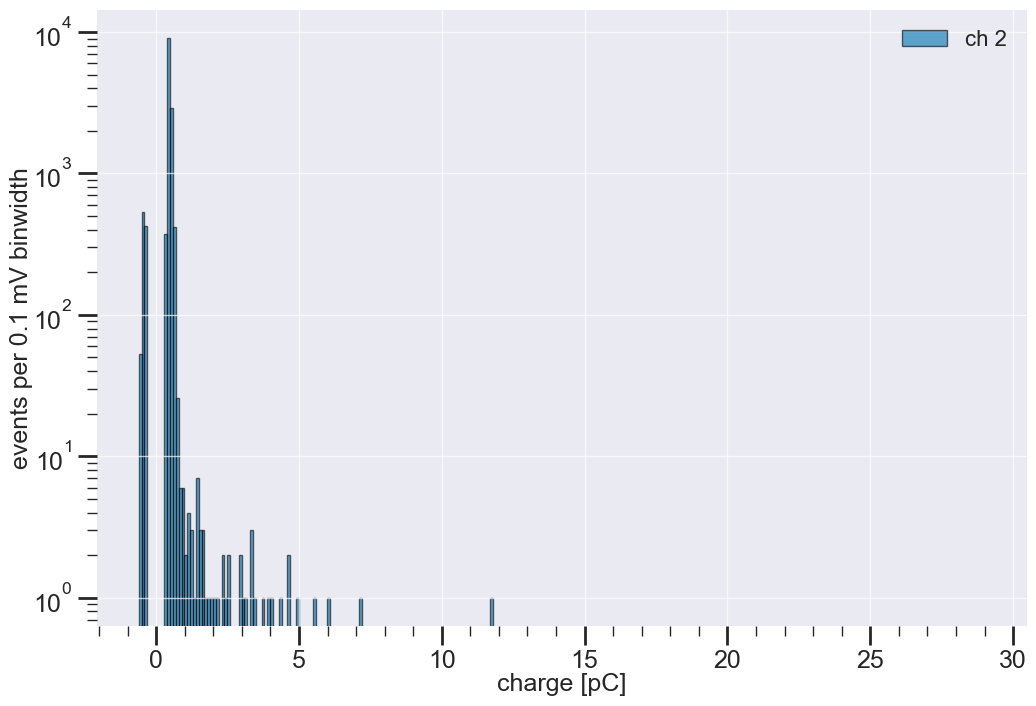

In [11]:
d = pickle.load(open("ds11_temp.p", "rb"))[0]
d = ds.reduced_df
fig, ax = plt.subplots()
h = np.array(d["ch2 charge"])
binwidth = 0.1 #pC
bins = np.arange(min(h), max(h), binwidth)
ax.hist(h, bins=bins, label="ch 2", alpha=0.6)

ax.legend()
ax.set_xlabel("charge [pC]")
ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
ax.set_yscale('log')
plt.show()



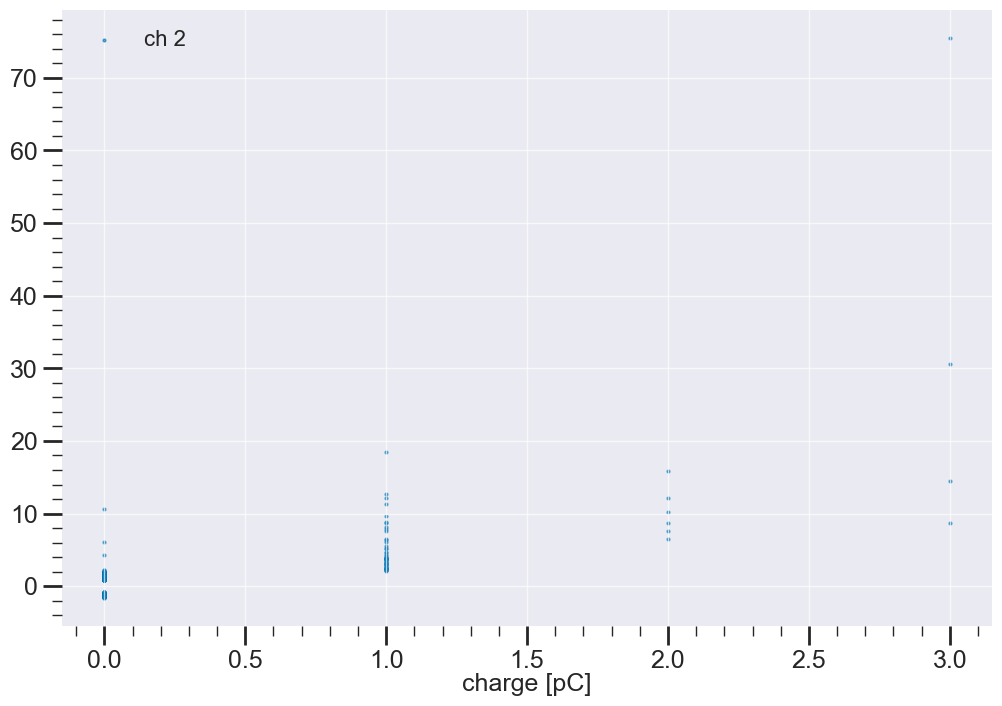

In [14]:
d = pickle.load(open("ds11_temp.p", "rb"))[0]
d = ds.reduced_df
fig, ax = plt.subplots()
n = np.array(d["ch2 n peaks"])
amp = np.array(d["ch2 amp"])
ax.scatter(n, amp, label="ch 2", alpha=0.6)

ax.legend()
ax.set_xlabel("charge [pC]")
#ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
#ax.set_yscale('log')
plt.show()



# Plotter for waveforms after making cuts

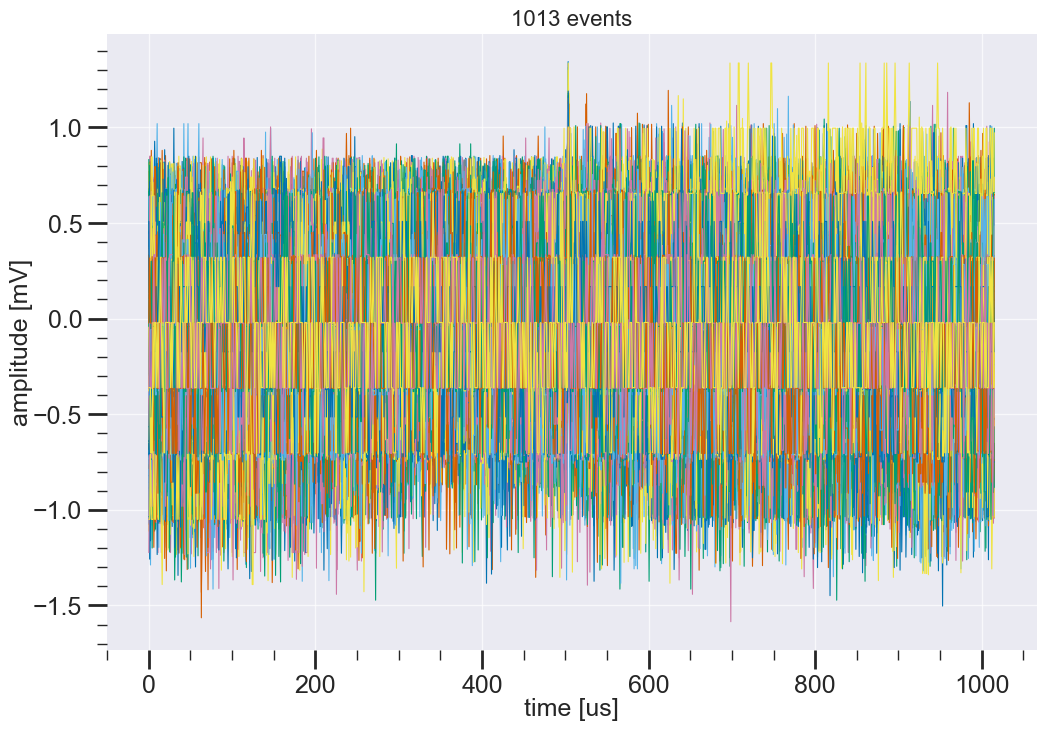

In [12]:
d = ds.reduced_df
cut = (d["ch2 charge"] < 0)
dd = d[cut]
filenames_set = list(set(list(dd["ch2 filename"])))
filenames = list(dd["ch2 filename"])
evidx = list(dd["ch2 evidx"])

overlay = True

if(overlay):
    fig, ax = plt.subplots()
for f in filenames_set:
    df, date = pickle.load(open(f, "rb"))
    for i in range(len(evidx)):
        red_row = dd.iloc[i]
        if(filenames[i] == f):
            event = df.iloc[evidx[i]]
            if(overlay):
                ds.plot_charge(event, ax=ax)
            else:
                ds.plot_charge(event)
                plt.show()
if(overlay):
    ax.set_title("{:d} events".format(len(evidx)))
    plt.show()


